## 0. 들어가며 - 공인중개사 철수 #2

철수는 천천마을의 모든 건물을 중개하는 공인중개사입니다.  
철수는 사람들에게 알맞는 건물을 소개해주는 것을 뿌듯해하며 자신의 직업에 만족하고 있습니다.     
하지만 그런 철수에게도 고민이 하나 있었으니... 그건 바로 자신이 관리해야하는 건물의 수가 너무 많다는 것입니다.  
천천마을은 아래처럼 1000 x 1000개, 즉 100만개의 건물로 이루어져 있습니다.  

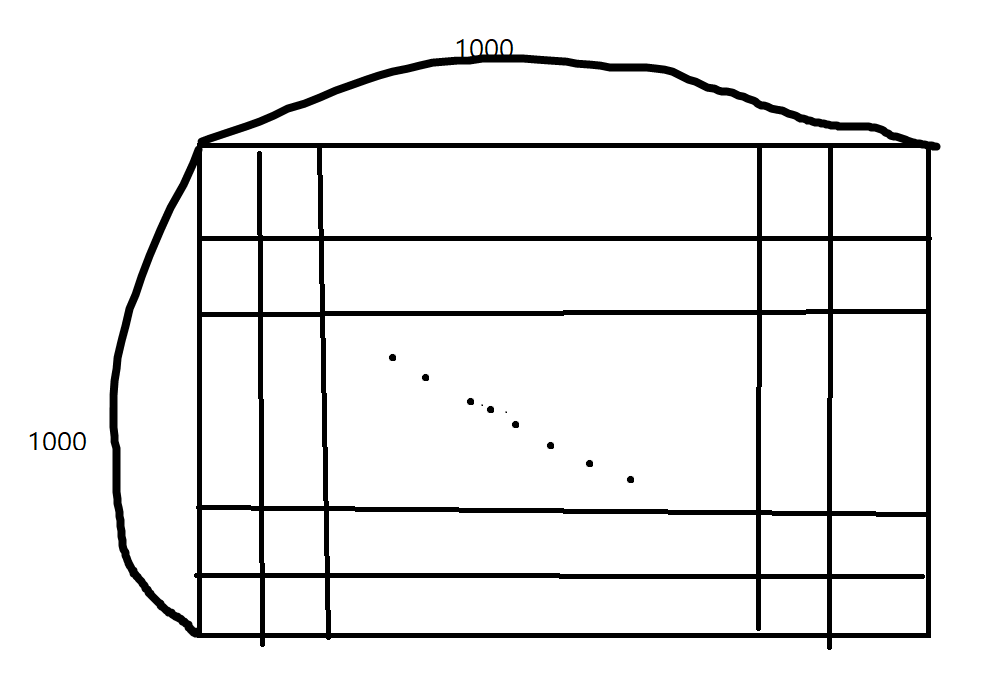

철수는 이 모든 건물을 수기로 기록하고 찾는데, 이 때문에 실수가 잦았습니다.   
철수는 결국 이 건물을 프로그램을 활용해서 관리하려고 합니다.  
철수는 프로그램으로 실수를 줄일 수만 있다면 백만금이라도 낼 의향이 있습니다.  
우리가 철수를 도와 프로그램을 개발해봅시다.   


## 1. 정사각형 구역을 찾아주세요!

"어떤 집을 찾으세요?"  
철수는 노련한 공인중개사의 면모를 풍기며 손님을 맞았습니다.  
"같은 재료로만 이루어진 건물을 찾는데요..."  

철수의 미간이 찌푸려졌습니다. '아니 저번에 17에 집착하던 손님도 그렇고 특이한 손님이 많네... 같은 재료로 지어진 건물들을 찾다니'  
"아하하 조금만 기다려주세요^^"

철수는 천천마을 어딘가에 24블록의 정사각형 구역이 있고, 그 동네의 건물은 모두 한 재료로만 지어졌다는 것을 알고 있었습니다.  
하지만 건물이 너무 많은 탓에 어딘지를 찾을 수가 없었습니다.  
"끙... 잠시만 기다려주세요. 건물이 너무 많아서요."  


철수는 같은 재료로만 이루어진 건물을 찾는 프로그램을 간절히 바랐습니다.     
'프로그램만 있었다면...'  

여러분들이 철수를 도와 정사각형 구역을 찾을 수 있는 프로그램을 작성해주세요.

### 1.1. 집 정보 불러오기

철수가 관리하는 건물들의 정보가 **numpy** array 형태로 저장되어 있습니다. 정보들을 불러온 후 크기와 자료형을 확인해 봅시다.
* `np.load(<파일 경로>)`는 경로에 위치한 파일을 읽어 numpy array 형태로 불러옵니다.
* `arr.shape`은 arr이 numpy array꼴의 변수인 경우에 해당 변수의 크기를 반환합니다.
* `arr.dtype`은 arr이 numpy array꼴의 변수인 경우에 해당 변수의 자료형을 반환합니다.

In [2]:
import numpy as np

house_arr = np.load('square.npy')
print(house_arr)
print(house_arr.shape)
print(house_arr.dtype)

[[11  8  1 ... 12 13  9]
 [ 4 15  3 ...  7  9  5]
 [ 5  4  5 ... 10  4  6]
 ...
 [ 8  7 10 ...  6 12  8]
 [ 4 14 15 ... 14  7 13]
 [13  5  8 ...  6  3 12]]
(1000, 1000)
int64


### 1.2. 배열 자르기

#### 개념 - 2차원 배열 자르기

2차원 배열 slicing은 다음과 같이 할 수 있습니다.  
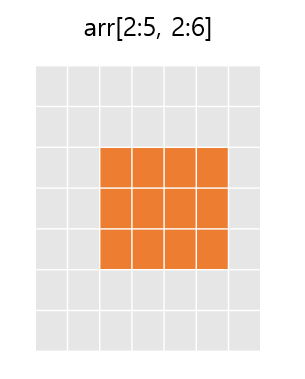
인덱스를 조금 더 자세히 볼까요?  
<center>
    [2:5, 2:6]
</center>
보통의 인덱스라면 `[2:6]`의 꼴을 띄고 있겠지만, 여기서는 `,`가 들어가 있는 것을 볼 수 있습니다.  
`,`는 인덱스가 적용될 차원을 구분할때 쓰입니다. `,` 앞에 있는 `2:5`는 1차원에, `,` 뒤에 있는 `2:6`은 2차원에 적용됩니다.   
1차원을 세로축, 2차원을 가로축이라 한다면 위의 그림과 같이 적용될 겁니다.  
예시 코드를 실행해볼까요?

In [5]:
arr = np.ones((7, 7)) # 7 x 7의 1로 이루어진 배열 생성 np.arange(10) .reshape(5,2)
arr = np.array(np.arange(49)).reshape(7,7)
print(arr)
arr[2:5, 2:6]

[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]]
19


array([[16, 17, 18, 19],
       [23, 24, 25, 26],
       [30, 31, 32, 33]])

#### 문제풀기

불러온 배열에 임의의 인덱스를 넣어 해당 인덱스로부터 24블록까지의 건물의 재료를 확인해봅시다.   
우리가 찾고자 하는 정사각형 구역의 크기는 가로, 세로 모두 24블록입니다.   
먼저 임의의 인덱스로부터 24블록까지 slicing해보고, 그 결과가 24블록이 맞는지 크기를 출력하여 확인해봅시다.   

In [7]:
i = 120  
j = 120  #임의의 인덱스 [120, 120]
sample = house_arr[i:i + 24, j:j + 24]  #임의의 인덱스로부터 가로, 세로 각각 24만큼 slicing합니다. ([i,j]를 좌측상단 꼭짓점으로 하는 정사각형이 slicing됩니다.)
sample.shape

(24, 24)

### 1.3. 같은 값인지 확인하기

철수는 뽑아낸 배열이 모두 같은 값인지 확인하려고 합니다.   
뽑아낸 배열 안의 원소가 모두 같은 값이라면, 해당 구역의 모든 집은 같은 재료로 지어졌을 것이기 때문입니다.  
철수는 뽑아낸 배열의 첫번째 값과 나머지 값들이 같은지를 확인하여 모든 원소가 동일한지 알아보려고 합니다.  
먼저 배열의 각 원소의 값들이 첫번째 원소와 같다면 True, 다르다면 False이 되도록 출력해보자.  

* `arr == <값>` - 배열의 모든 원소가 값과 일치한지를 비교한다. 값이 같다면 `True`를, 다르다면 `False`를 출력한다.

In [6]:
i = 120
j = 120
sample = house_arr[i:i + 24, j:j + 24]
sample == sample[0, 0]

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False],
       [False, False, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False,  True,  True, False,
        False, False, False, False, False,  True],
       [False, False, False, False,

### 1.4. 같은 값인지 확인하기

1.3에서 출력한 True, False의 배열에 모두 True가 존재하는지 확인해보자.  
* `np.all(arr)`은 numpy array인 arr가 모두 True인지 확인한 후 모두 True라면 True, 아니라면 False를 반환합니다.

In [7]:
np.all(sample[0, 0] == sample)

False

### 1.5. 반복하기

철수는 배열 내의 인덱스를 좌측 상단 꼭짓점으로 하는 모든 정사각형에 대해 1.3~1.4의 작업을 반복하려고 합니다. 그림과 같이 반복문을 구현보세요.  
* 정사각형의 길이를 가정하여 인덱스의 범위를 설정한다.
* 만약 특정 구역의 재료가 모두 동일하다면, 해당 구역의 좌측 상단 인덱스를 출력한다.
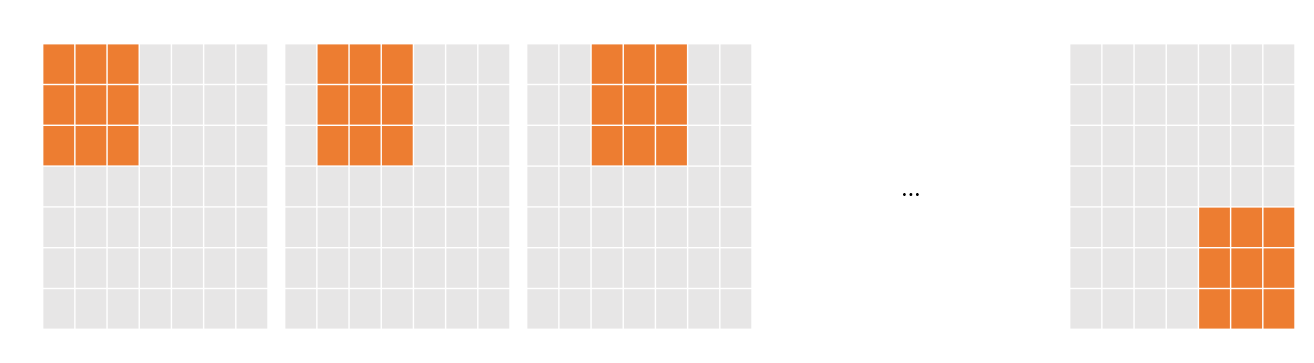


In [8]:
'''
인덱스를 사용할 때 중요한 것은 array의 크기입니다. array크기를 넘어가는 값을 인덱스로 주면 오류가 발생합니다.
우리는 주어진 인덱스에 24만큼 더해진 인덱스까지를 slicing할 것이기 때문에 마지막 24만큼을 제외하고 반복해야 인덱스 오류가 발생하지 않습니다.
'''

for i in range(1000 - 24): # 배열의 인덱스 중 첫번째 값(행)을 나타냅니다. i는 우측으로 24이상을 남겨두어야 24*24 크기의 정사각형을 만들 수 있습니다.
    for j in range(1000 - 24): # 배열의 인덱스 중 두번째 값(열)을 나타냅니다. j는 하단에 24이상을 남겨두어야 24*24 크기의 정사각형을 만들 수 있습니다.  
        sample = house_arr[i:i + 24, j:j + 24]
        result = np.all(sample == sample[0, 0])

        if result: #result가 참이라면, 즉 해당 구역의 재료가 모두 sample[0,0]과 동일하다면 아래 명령어를 실행합니다.
            print(result)
            print(i, j)


True
656 540


### 1.5. 검증하기
철수는 마침내 재료가 같은 정사각형 구역을 찾아낼 수 있었다.
1.4에서 알아낸 인덱스를 활용해 해당 구역을 출력해보자.

In [14]:
house_arr[656:656 + 24, 540: 540 + 24]

array([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4],
       [4, 4, 4, 4, 4

## 2. 엔딩

"오래 기다리셨습니다! 마침 같은 재료로 지어진 건물은 찾았습니다. 다만 서두르셔야 겠어요"  
손님의 눈이 동그라졌다.  
"하하. 선생님 무슨 일인데 그러시나요?"  
"집이 하나밖에 남지 않았거든요. 그런데 최근에 비슷한 문의를 주신 분이 계셔서... 곧 나갈지도 모릅니다."

사실 그런 문의는 받은적이 없는 철수였다.  
그 사실은 모르는 손님의 입이 쩌억 벌어졌다.  
"바..바로 사겠습니다."  
"네 여기로 오셔서 도장 찍으시죠"  
철수는 싱글벙글 웃으며 손님에게 계약서를 내밀었다.  
